In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('movies.csv')
data.head(10)

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
5,2012,Action,39,63,200,2009
6,27 Dresses,Comedy,40,71,30,2008
7,30 Days of Night,Horror,50,57,32,2007
8,30 Minutes or Less,Comedy,43,48,28,2011
9,50/50,Comedy,93,93,8,2011


In [5]:
data = data.rename(columns={ "Rotten Tomatoes Ratings %": "CritRating",
"Audience Ratings %": "AudRating",
"Budget (million $)": "Budget",
"Year of release": "Year"
})
data

,Film,Genre,CritRating,AudRating,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [10]:
data.Film = data.Film.astype('category')
data.Year = data.Year.astype('category')
data.Genre = data.Genre.astype('category')
data.info()
data.Genre.cat.categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Film        559 non-null    category
 1   Genre       559 non-null    category
 2   CritRating  559 non-null    int64   
 3   AudRating   559 non-null    int64   
 4   Budget      559 non-null    int64   
 5   Year        559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

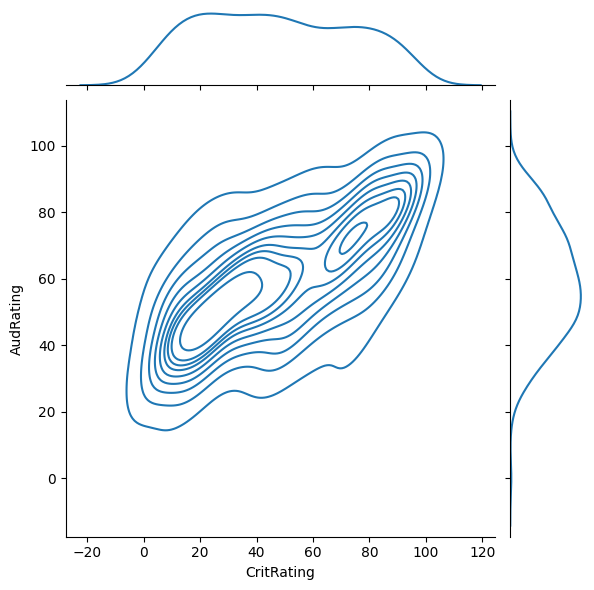

In [19]:
sns.jointplot(data, x='CritRating', y='AudRating', kind="kde")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


(array([ 2.,  0.,  0.,  1.,  2., 12., 18., 35., 40., 41., 61., 63., 52.,
        53., 33., 54., 34., 30., 23.,  5.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ,
        52.8, 57.6, 62.4, 67.2, 72. , 76.8, 81.6, 86.4, 91.2, 96. ]),
 <BarContainer object of 20 artists>)

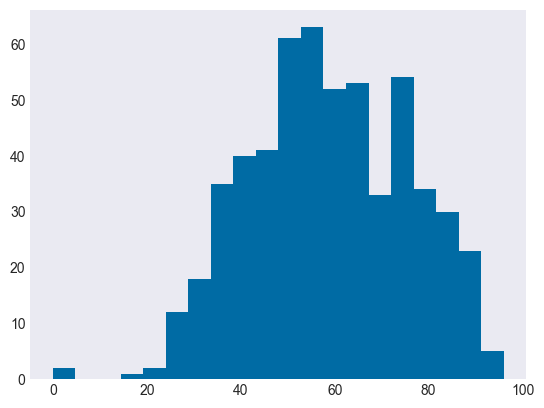

In [26]:
plt.style.use('tableau-colorblind10')
print(plt.style.available)

plt.hist(data.AudRating, bins= 20)

(array([[ 9., 39., 24., 13., 16.,  9.,  8., 14.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.],
        [48., 80., 35., 19., 18., 10.,  8., 15.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.]]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 2 BarContainer objects>)

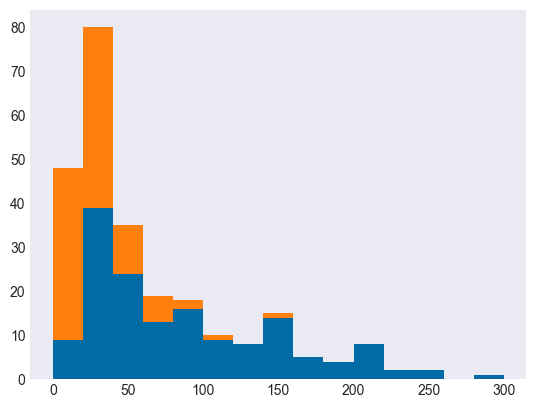

In [44]:
action_budget = data[data.Genre == 'Action'] # 154 rows
drama_budget = data[data.Genre == 'Drama'] # 101 rows
action_drama_budget = [action_budget.Budget, drama_budget.Budget]

# action_drama_budget # dataFrame with different rows.
plt.hist(action_drama_budget, stacked=True, bins=15)